In [21]:
# adjust the directory so that we can import local source
import sys
import os

# Add the repo root to sys.path
ROOT_REL_PATH_FROM_NB = "../.."
repo_path = os.path.abspath(os.path.join(os.getcwd(), ROOT_REL_PATH_FROM_NB))  # adjust as needed
if repo_path not in sys.path:
    sys.path.insert(0, repo_path)

print(sys.path)

['/Users/ppeaungvongpakdy/Documents/Research/votekit_bt/VoteKit', '/Users/ppeaungvongpakdy/miniforge3/lib/python312.zip', '/Users/ppeaungvongpakdy/miniforge3/lib/python3.12', '/Users/ppeaungvongpakdy/miniforge3/lib/python3.12/lib-dynload', '', '/Users/ppeaungvongpakdy/miniforge3/lib/python3.12/site-packages', '/Users/ppeaungvongpakdy/choix', '/Users/ppeaungvongpakdy/miniforge3/lib/python3.12/site-packages/setuptools/_vendor']


In [22]:
from src.votekit.ballot_generator import name_BradleyTerry 
from src.votekit.pref_interval import PreferenceInterval
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
## setup the classes
#n_cands = 5
#cands = [chr(ord('a')+i) for i in range(n_cands)] # TODO: need a better way of generating cands which allow us to go larger than 26
#print("candidates: ", cands)

cands = ["W1", "W2", "C1", "C2"]
bt = name_BradleyTerry(
    candidates=cands,
        pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.6, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.05, "C2": 0.05}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        bloc_voter_prop={"W": 0.9, "C": 0.1 },
        cohesion_parameters={"W": {"W": 0.5, "C": 0.5}, "C": {"C": 0.9, "W": 0.1}},
    )

'''
pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.4, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.2, "C2": 0.1}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        #bloc_voter_prop={"W": 0.7, "C": 0.3},
    '''
8

8

In [ ]:
# bug testing


## Preliminary Distribution Investigations

In [4]:
# run BT both ways and then process the differences
num_ballots = 10000#int(10e5)
bals_BT_classic = bt.generate_profile(num_ballots)
#bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=False)
bals_BT_MCMC_shortcut = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=True)


In [5]:
#print(sum(bt.pdfs_by_bloc['C'].values()))
print(bt.pdfs_by_bloc)

## cheat, since above we have the same number of ballots
pdfs_BB_W = {
    "".join(list(bal)) : bt.pdfs_by_bloc["W"][bal] for bal in bt.pdfs_by_bloc["W"]
}
pdfs_BB_C = {
    "".join(list(bal)) : bt.pdfs_by_bloc["C"][bal] for bal in bt.pdfs_by_bloc["C"]
}

#pdfs_as_heights = {k : pdfs}


{'W': {('W1', 'W2', 'C1', 'C2'): 0.04309764309764311, ('W1', 'W2', 'C2', 'C1'): 0.04309764309764311, ('W1', 'C1', 'W2', 'C2'): 0.06464646464646466, ('W1', 'C1', 'C2', 'W2'): 0.09696969696969698, ('W1', 'C2', 'W2', 'C1'): 0.06464646464646466, ('W1', 'C2', 'C1', 'W2'): 0.09696969696969698, ('W2', 'W1', 'C1', 'C2'): 0.021548821548821553, ('W2', 'W1', 'C2', 'C1'): 0.021548821548821553, ('W2', 'C1', 'W1', 'C2'): 0.016161616161616165, ('W2', 'C1', 'C2', 'W1'): 0.012121212121212123, ('W2', 'C2', 'W1', 'C1'): 0.016161616161616165, ('W2', 'C2', 'C1', 'W1'): 0.012121212121212123, ('C1', 'W1', 'W2', 'C2'): 0.04848484848484849, ('C1', 'W1', 'C2', 'W2'): 0.07272727272727272, ('C1', 'W2', 'W1', 'C2'): 0.024242424242424246, ('C1', 'W2', 'C2', 'W1'): 0.01818181818181818, ('C1', 'C2', 'W1', 'W2'): 0.054545454545454536, ('C1', 'C2', 'W2', 'W1'): 0.027272727272727268, ('C2', 'W1', 'W2', 'C1'): 0.04848484848484849, ('C2', 'W1', 'C1', 'W2'): 0.07272727272727272, ('C2', 'W2', 'W1', 'C1'): 0.0242424242424242

### Visualize the frequency differences between MCMC and classic BT method

False
{'C1W1W2C2': 470, 'C1W1C2W2': 24, 'C1C2W2W1': 239, 'C1C2W1W2': 211, 'C1W2C2W1': 31, 'C1W2W1C2': 2, 'W1C1W2C2': 1, 'W1C1C2W2': 1, 'W1C2W2C1': 608, 'W1C2C1W2': 1, 'W1W2C1C2': 364, 'W1W2C2C1': 398, 'C2W1W2C1': 5, 'C2W1C1W2': 37, 'C2C1W2W1': 204, 'C2C1W1W2': 206, 'C2W2C1W1': 34, 'C2W2W1C1': 211, 'W2W1C1C2': 208, 'W2W1C2C1': 208, 'W2C1C2W1': 4, 'W2C1W1C2': 150, 'W2C2C1W1': 112, 'W2C2W1C1': 157}
['W1', 'W2', 'C1', 'C2']


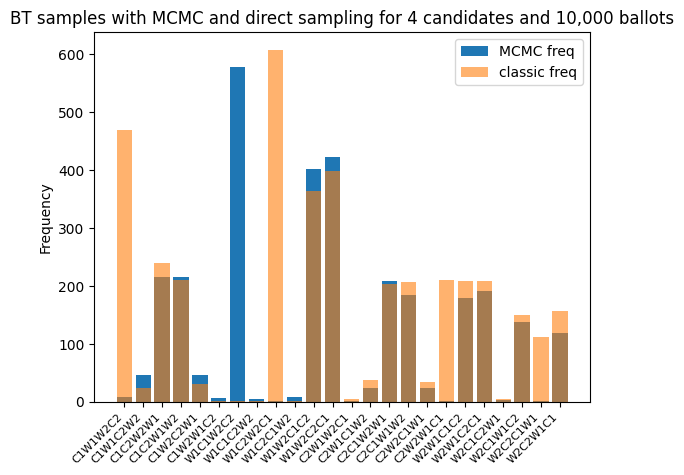

In [6]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]

ballot_rankings_MCMC_shortcut = [bal.ranking for bal in bals_BT_MCMC_shortcut.ballots]
bal_labels_MCMC_shortcut = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_shortcut]
bal_weights_MCMC_shortcut = [int(bal.weight) for bal in bals_BT_MCMC_shortcut.ballots]

ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

print(bal_labels_classic == bal_labels_MCMC) # labels not in the same order, so set up a map 

# map ballots to weights for each method
bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i] for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i] for i in range(len(ballot_rankings_MCMC))}
bal_rankings_map_MCMC_shortcut = {bal_labels_MCMC_shortcut[i]: bal_weights_MCMC_shortcut[i] for i in range(len(ballot_rankings_MCMC_shortcut))}

# convert the bt instance pdfs to a viz-able form

print(bal_rankings_map_classic)
x_labels = list(bal_rankings_map_classic.keys())

plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq")
#plt.bar(x_labels, [bal_rankings_map_MCMC_shortcut[k] for k in x_labels], label="MCMC shortcut freq", alpha=0.6)
plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend()
plt.ylabel("Frequency")
plt.title(f"BT samples with MCMC and direct sampling for {len(cands)} candidates and {num_ballots:,} ballots")

8
print(cands)


In [7]:
bals_BT_MCMC.ballots

(Ranking
 1.) W2, 
 2.) C1, 
 3.) W1, 
 4.) C2, 
 Weight: 137.0,
 Ranking
 1.) W2, 
 2.) C1, 
 3.) C2, 
 4.) W1, 
 Weight: 113.0,
 Ranking
 1.) W2, 
 2.) W1, 
 3.) C1, 
 4.) C2, 
 Weight: 179.0,
 Ranking
 1.) W2, 
 2.) W1, 
 3.) C2, 
 4.) C1, 
 Weight: 191.0,
 Ranking
 1.) W2, 
 2.) C2, 
 3.) W1, 
 4.) C1, 
 Weight: 118.0,
 Ranking
 1.) W2, 
 2.) C2, 
 3.) C1, 
 4.) W1, 
 Weight: 104.0,
 Ranking
 1.) W1, 
 2.) C1, 
 3.) C2, 
 4.) W2, 
 Weight: 821.0,
 Ranking
 1.) W1, 
 2.) C1, 
 3.) W2, 
 4.) C2, 
 Weight: 578.0,
 Ranking
 1.) W1, 
 2.) W2, 
 3.) C1, 
 4.) C2, 
 Weight: 402.0,
 Ranking
 1.) W1, 
 2.) W2, 
 3.) C2, 
 4.) C1, 
 Weight: 422.0,
 Ranking
 1.) W1, 
 2.) C2, 
 3.) C1, 
 4.) W2, 
 Weight: 884.0,
 Ranking
 1.) W1, 
 2.) C2, 
 3.) W2, 
 4.) C1, 
 Weight: 609.0,
 Ranking
 1.) C2, 
 2.) C1, 
 3.) W1, 
 4.) W2, 
 Weight: 553.0,
 Ranking
 1.) C2, 
 2.) C1, 
 3.) W2, 
 4.) W1, 
 Weight: 272.0,
 Ranking
 1.) C2, 
 2.) W1, 
 3.) C1, 
 4.) W2, 
 Weight: 653.0,
 Ranking
 1.) C2, 
 2.) W

## TV Distance Empirics

In [9]:
def total_variation_distance(P, Q, labels):
    sum = 0 
    for x in labels:
        sum += abs(P[x] - Q[x])
    return (1/2)*sum

In [10]:
test_bals = bt.generate_profile(10000).group_ballots()
sum([b.weight for b in test_bals.ballots])
test_rankings = [bal.ranking for bal in test_bals.ballots]
test_bal_labels = [  "".join([list(cand)[0] for cand in ranking])  for ranking in test_rankings]
#print(bal_labels[0])
test_bal_weights = [int(bal.weight) for bal in test_bals.ballots]
#print(sum(test_bal_weights))
#print(len(test_bal_weights))


print("len set")
print(
    len(set(test_bal_labels))
)

print(sum([test_bal_weights[i] for i in range(len(test_bal_labels))]))

print(zip())

test_map = {
  test_bal_labels[i] : test_bal_weights[i] for i in range(len(test_bal_labels))  
}



print(sum(test_map.values()))

len set
24
10000
10000


In [11]:
keys = ["A", "B", "C", "A"]
values = [0,1,2,3]

{keys[i] : values[i] for i in range(len(keys))}

{'A': 3, 'B': 1, 'C': 2}

In [19]:
num_ballots_array = np.linspace(100, 2000, 100)
num_ballots_array = num_ballots_array.astype(int)[1:]
num_trials_per_ballot_size = 100

tv_distances_non_shortcut = []
tv_distances_shortcut = []
for num_ballots in tqdm(num_ballots_array):
    running_total_non_shortcut = 0
    running_total_shortcut = 0
    for _ in range(num_trials_per_ballot_size):
        ## -- Intialize the ballots ------------ 
        bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False).group_ballots()
        bals_BT_MCMC_shortcut = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=True).group_ballots() ## TODO: ON_SHORTCUT IS NOT SPECIFIED HERE
        bals_BT_classic = bt.generate_profile(num_ballots).group_ballots()
        
        ## -- Calculate the frequencies ----------------
        ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
        bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
        bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]

        ballot_rankings_MCMC_shortcut = [bal.ranking for bal in bals_BT_MCMC_shortcut.ballots]
        bal_labels_MCMC_shortcut = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_shortcut]
        bal_weights_MCMC_shortcut = [int(bal.weight) for bal in bals_BT_MCMC_shortcut.ballots]
        
        ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
        bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
        bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]
        
        
        bal_rankings_map_classic_as_freq = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(bal_labels_classic))}
        bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(bal_labels_MCMC))}
        bal_rankings_map_MCMC_shortcut_as_freq = {bal_labels_MCMC_shortcut[i]: bal_weights_MCMC_shortcut[i] / num_ballots for i in range(len(bal_labels_MCMC_shortcut))}

        # populate any missing keys
        # note: in general the classic map should have all the keys since
        # it computes the pdf directly. However, this procedure should
        # work in cases where we may not have the classic map
        all_keys = [list(m.keys()) for m in [
            bal_rankings_map_classic_as_freq, bal_rankings_map_MCMC, bal_rankings_map_MCMC_shortcut_as_freq
        ]]
        flattened_keys = [k for sublist in all_keys for k in sublist]

        for key in flattened_keys:
            bal_rankings_map_MCMC_shortcut_as_freq.setdefault(key, 0) 
            bal_rankings_map_MCMC.setdefault(key, 0) 
            bal_rankings_map_classic_as_freq.setdefault(key, 0) 

        # increment the recorded tv distances
        x_labels = list(bal_rankings_map_classic_as_freq.keys())
        running_total_non_shortcut += total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic_as_freq, x_labels)
        running_total_shortcut += total_variation_distance(bal_rankings_map_MCMC_shortcut_as_freq, bal_rankings_map_classic_as_freq, x_labels)

    tv_distances_non_shortcut.append(running_total_non_shortcut/num_trials_per_ballot_size)
    tv_distances_shortcut.append(running_total_shortcut/num_trials_per_ballot_size)


100%|███████████████████████████████████████████| 99/99 [11:41<00:00,  7.09s/it]


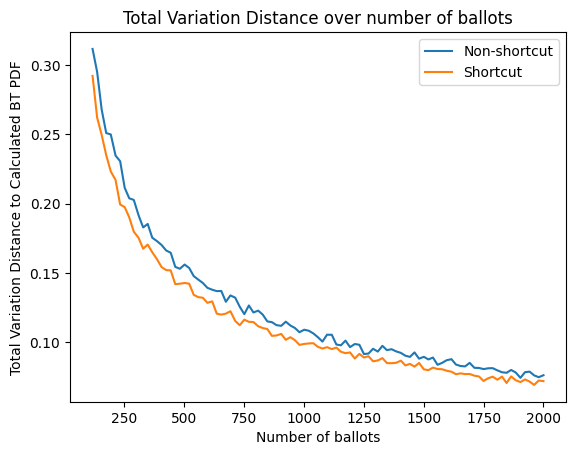

In [20]:
### Plot TV Distance as a function of ballots
plt.plot(num_ballots_array, tv_distances_non_shortcut, label="Non-shortcut")
plt.plot(num_ballots_array, tv_distances_shortcut, label="Shortcut")
plt.legend()
plt.xlabel("Number of ballots")
plt.ylabel("Total Variation Distance to Calculated BT PDF")
plt.title("Total Variation Distance over number of ballots")
plt.show()

### Time investigations for BT methods

In [15]:
## run both classic and both types of MCMC runs for maybe 1k, 5k, 10k ballots with various n and see how they compare
## might be worth writing a method to generate data for $n$ candidates so that we can scale $n$ easily
def generate_BT_args(n_cands, alpha=1):
    '''
        generates arguments for name_BradleyTerry with n_cands,
        generates single slate and single bloc, 
    '''
    # num cands goes up to 26
    cands = [chr(ord('a')+i) for i in range(n_cands)]
    bloc_name = "H"
    pref_interval = PreferenceInterval.from_dirichlet(candidates=cands, alpha=alpha)
    pref_intervals_by_bloc = {
        bloc_name: {
            bloc_name : pref_interval
        }
    }
    bloc_voter_prop = {bloc_name: 1}
    cohesion_paramteters = {
        bloc_name: {
            bloc_name: 1
        }
    }
    
    return {
        "candidates": cands,
        "pref_intervals_by_bloc": pref_intervals_by_bloc,
        "bloc_voter_prop" : bloc_voter_prop,
        "cohesion_parameters": cohesion_paramteters
    }


#bt_args = generate_BT_args(5, alpha=1)
#dummy_method(**bt_args)
#test_BT = name_BradleyTerry(**bt_args)

In [16]:
# 5 candidates run time sampling
bt_5_cands = name_BradleyTerry(**generate_BT_args(n_cands=5, alpha=1))
n_ballots = 5000
%timeit bt_5_cands.generate_profile(n_ballots)
%timeit bt_5_cands.generate_profile_MCMC(n_ballots)

52.9 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
50.3 ms ± 489 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
# 10 candidates run time sampleing
bt_10_cands = name_BradleyTerry(**generate_BT_args(n_cands=10, alpha=1))
n_ballots = 1000
%timeit bt_10_cands.generate_profile(n_ballots)
%timeit bt_10_cands.generate_profile_MCMC(n_ballots)

514 ms ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
56.9 ms ± 407 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
# 20 candidates run time sampling
bt_20_cands = name_BradleyTerry(**generate_BT_args(n_cands=20, alpha=1))
n_ballots = 1000
# check that generate_profile actually throws an error with this many cands
%timeit bt_20_cands.generate_profile_MCMC(n_ballots)
%timeit bt_20_cands.generate_profile_MCMC(n_ballots, on_shortcut_graph=True)

/Users/ppeaungvongpakdy/Documents/Research/votekit_bt/VoteKit/src/votekit/ballot_generator.py:834: UserWarning: For 12 or more candidates, exact sampling is computationally infeasible.                     Please only use the built in generate_profile_MCMC method.
  warnings.warn(


120 ms ± 641 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
61.6 ms ± 604 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
